## NUKALA NAGA PAVAN

##                    Predicting Loan Repayment

In [1]:
import numpy as np
import pandas as pd

## Problem 2.1 - Prediction Models
Now that we have prepared the dataset, we need to split it into a training and testing set. To ensure everybody obtains the same split, set the random seed to 144 (even though you already did so earlier in the problem) and use the sample.split function to select the 70% of observations for the training set (the dependent variable for sample.split is not.fully.paid). Name the data frames train and test.

Now, use logistic regression trained on the training set to predict the dependent variable not.fully.paid using all the independent variables.

Which independent variables are significant in our model? (Significant variables have at least one star, or a Pr(>|z|) value less than 0.05.) Select all that apply.

credit.policy

 purpose2 (credit card)
 
 purpose3 (debt consolidation)
 
 purpose4 (educational)
 
 purpose5 (home improvement)
 
 purpose6 (major purchase)
 
 purpose7 (small business)
 
 int.rate
 
 installment
 
 log.annual.inc
 
 dti
 
 fico
 
 days.with.cr.line
 
 revol.bal
 
 revol.util
 
 inq.last.6mths
 
 delinq.2yrs
 
 pub.rec


In [2]:
data=pd.read_csv("loans_imputed.csv")

In [3]:
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
X_features = list(data.columns )
X_features.remove('not.fully.paid')
X_features

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec']

In [6]:
data_complete = pd.get_dummies(data[X_features],drop_first=True) 

In [7]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9578 non-null uint8
purpose_small_business        9

In [8]:
y=data['not.fully.paid']

In [9]:
x=data_complete

In [10]:
from sklearn.cross_validation import train_test_split

C:\Users\nagapavan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3 , random_state = 144 )

In [12]:
y_test[0:5]

1914    0
6759    0
5482    1
5565    0
7161    0
Name: not.fully.paid, dtype: int64

In [13]:
import statsmodels.api as sm

C:\Users\nagapavan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [15]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.414813
         Iterations 6


In [16]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6685
Method:                           MLE   Df Model:                           18
Date:                Fri, 31 Aug 2018   Pseudo R-squ.:                 0.06868
Time:                        03:50:26   Log-Likelihood:                -2780.9
converged:                       True   LL-Null:                       -2986.0
                                        LLR p-value:                 6.964e-76
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.6816      1.536      5.653      0.000       5.672      11.692
credit.policy                 -0.3415      0.100     -3.417      0.001      -0.537      -0.146
int.rate                       1.2606      2.024      0.623      0.533      -2.707       5.228
installment                    0.0014      0.000      6.862      0.000       0.001       0.002
log.annual.inc                -0.3831      0.071     -5.425      0.000      -0.521      -0.245
dti                            0.0007      0.005      0.130      0.896      -0.010       0.011
fico                          -0.0093      0.002     -5.533      0.000      -0.013      -0.006
days.with.cr.line           1.535e-06   1.61e-05      0.095      0.924      -3e-05    3.31e-05
revol.bal                    2.87e-06   1.15e-06      2.493      0.013    6.14e-07    5.13e-06
revol.util                     0.0026      0.002      1.709      0.087      -0.000       0.006
inq.last.6mths                 0.0815      0.016      5.123      0.000       0.050       0.113
delinq.2yrs                   -0.0970      0.065     -1.493      0.136      -0.224       0.030
pub.rec                        0.2212      0.118      1.876      0.061      -0.010       0.452
purpose_credit_card           -0.6795      0.132     -5.164      0.000      -0.937      -0.422
purpose_debt_consolidation    -0.4784      0.091     -5.277      0.000      -0.656      -0.301
purpose_educational           -0.1206      0.183     -0.659      0.510      -0.479       0.238
purpose_home_improvement      -0.0891      0.149     -0.599      0.549      -0.381       0.203
purpose_major_purchase        -0.4841      0.199     -2.430      0.015      -0.875      -0.094
purpose_small_business         0.3013      0.138      2.182      0.029       0.031       0.572
==============================================================================================
"""

In [17]:
def get_predictions( y_train, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_train,
                               "predicted_prob": model.predict( sm.add_constant( x_train ) ) } )
    return y_pred_df

In [18]:
y_pred_df = get_predictions( y_train, lg )

In [19]:
y_pred_df[0:10]

,actual,predicted_prob
6559,0,0.063574
9180,0,0.526504
5829,0,0.086411
2971,0,0.274037
272,0,0.042725
5538,0,0.106118
3393,0,0.168104
2157,0,0.098226
6729,0,0.090676
6260,0,0.045736


In [20]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [21]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
6559,0,0.063574,0
9180,0,0.526504,1
5829,0,0.086411,0
2971,0,0.274037,0
272,0,0.042725,0
5538,0,0.106118,0
3393,0,0.168104,0
2157,0,0.098226,0
6729,0,0.090676,0
6260,0,0.045736,0


### Getting Significant Variables

In [22]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [23]:
significant_vars = get_significant_vars( lg )

In [24]:
significant_vars

['const',
 'credit.policy',
 'installment',
 'log.annual.inc',
 'fico',
 'revol.bal',
 'inq.last.6mths',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_major_purchase',
 'purpose_small_business']

### 'const','credit_policy','installment','log_annual_inc','fico','revol_bal','inq_last_6mths','purpose_credit_card',
### 'purpose_debt_consolidation','purpose_major_purchase','purpose_small_business'   
 are the significant variables

## Problem 1.0 - Prediction Models
Consider two loan applications, which are identical other than the fact that the borrower in Application A has FICO credit score 700 while the borrower in Application B has FICO credit score 710.
Let Logit(A) be the log odds of loan A not being paid back in full, according to our logistic regression model, and define Logit(B) similarly for loan B. What is the value of Logit(A) - Logit(B)?

Now, let O(A) be the odds of loan A not being paid back in full, according to our logistic regression model, and define O(B) similarly for loan B. What is the value of O(A)/O(B)? (HINT: Use the mathematical rule that exp(A + B + C) = exp(A)*exp(B)*exp(C). Also, remember that exp() is the exponential function in R.)


In [25]:
logA= 8.6816+(-0.0093*700)
logB= 8.6816+(-0.0093*710)

In [26]:
diff = logA - logB

In [27]:
diff

0.09299999999999997

## The value of Logit(A) - Logit(B) = 0.09299999999999997

In [28]:
div = np.exp(logA)/np.exp(logB)
div

1.097461735268082

## The value of O(A)/O(B) = 1.097461735268082

## Problem 1.1 - Prediction Models
Predict the probability of the test set loans not being paid back in full (remember type="response" for the predict function). Store these predicted probabilities in a variable named predicted risk and add it to your test set (we will use this variable in later parts of the problem). Compute the confusion matrix using a threshold of 0.5.

What is the accuracy of the logistic regression model? Input the accuracy as a number between 0 and 1.


What is the accuracy of the baseline model? Input the accuracy as a number between 0 and 1.


In [29]:
from sklearn import metrics

In [30]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": model.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [31]:
y_pred_df = get_predictions( y_test, lg )

In [32]:
y_pred_df[0:10]

,actual,predicted_prob
1914,0,0.131073
6759,0,0.051589
5482,1,0.091290
5565,0,0.053051
7161,0,0.239891
8606,0,0.181799
4801,0,0.183830
5556,0,0.081921
5257,0,0.049279
3976,0,0.162668


In [33]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [34]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
1914,0,0.131073,0
6759,0,0.051589,0
5482,1,0.091290,0
5565,0,0.053051,0
7161,0,0.239891,0
8606,0,0.181799,0
4801,0,0.183830,0
5556,0,0.081921,0
5257,0,0.049279,0
3976,0,0.162668,0


In [35]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [36]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [37]:
 metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted)

array([[2424,   13],
       [ 423,   14]], dtype=int64)

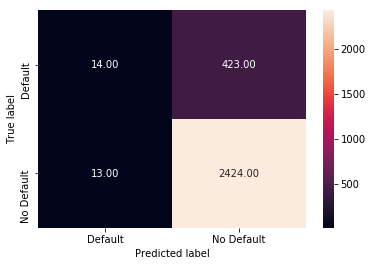

In [38]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [39]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.85


In [40]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [43]:
baseline = (cm1[1,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,1]+cm1[1,0])

In [44]:
print('Baseline_model : ', round( baseline, 2) )

Baseline_model :  0.85


##  Problem 2.0 - Prediction Models
Use the appropriate package to compute the test set AUC.
The model has poor accuracy at the threshold 0.5. But despite the poor accuracy, we will see later how an investor can still leverage this logistic regression model to make profitable investments.


In [121]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.67

The auc is 0.67


##     

##   Problem 2.1 - A "Smart Baseline"
In the previous problem, we built a logistic regression model that has an AUC significantly higher than the AUC of 0.5 that would be obtained by randomly ordering observations.
However, LendingClub.com assigns the interest rate to a loan based on their estimate of that loan's risk. This variable, int.rate, is an independent variable in our dataset. In this part, we will investigate using the loan's interest rate as a "smart baseline" to order the loans according to risk.
Using the training set, build a bivariate logistic regression model (aka a logistic regression model with a single independent variable) that predicts the dependent variable not.fully.paid using only the variable int.rate.
The variable int.rate is highly significant in the bivariate model, but it is not significant at the 0.05 level in the model trained with all the independent variables. What is the most likely explanation for this difference?
 int.rate is correlated with other risk-related variables, and therefore does not incrementally improve the model when those other variables are included.
 This effect is likely due to the training/testing set split we used. In other splits, we could see the opposite effect.
 These models are trained on a different set of observations, so the coefficients are not comparable.



In [127]:
x_smart = x_train['int.rate']
y_smart = y_train

In [128]:
logit_smart = sm.Logit( y_smart, sm.add_constant( x_smart ) )

In [129]:
lg_smart = logit_smart.fit()

Optimization terminated successfully.
         Current function value: 0.432369
         Iterations 6


In [130]:
lg_smart.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6702
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                 0.02926
Time:                        14:53:36   Log-Likelihood:                -2898.6
converged:                       True   LL-Null:                       -2986.0
                                        LLR p-value:                 6.762e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7018      0.167    -22.162      0.000      -4.029      -3.374
int.rate      16.2987      1.252     13.016      0.000      13.844      18.753
==============================================================================
"""

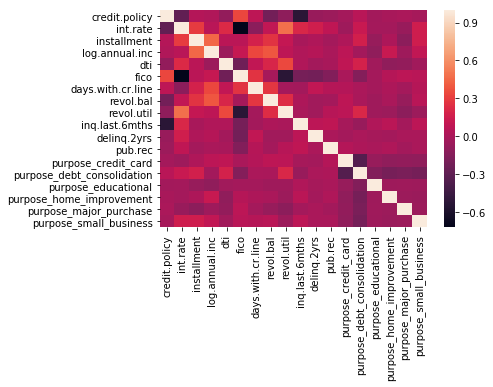

In [132]:
import seaborn as sns
corr = x_test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

##  int.rate is correlated with other risk-related variables, and therefore does not incrementally improve the model when those other variables are included.(Here it'shighly correlated with credit.policy )

## Problem 2.2 - A "Smart Baseline"
Make test set predictions for the bivariate model. What is the highest predicted probability of a loan not being paid in full on the testing set?

With a logistic regression cutoff of 0.5, how many loans would be predicted as not being paid in full on the testing set?


In [173]:
def get_predictions( y_test, model ):
    y_pred_smart = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": model.predict( sm.add_constant( x_test['int.rate'] ) ) } )
    return y_pred_smart

In [174]:
y_pred_smart = get_predictions( y_test, lg_smart )

In [145]:
y_pred_smart.head()

,actual,predicted_prob
1914,0,0.106007
6759,0,0.090982
5482,1,0.183918
5565,0,0.080155
7161,0,0.220376


In [175]:
y_pred_smart.predicted_prob.max()

0.42510485714939406

 ## The highest predicted probability of a loan not being paid in full on the testing set = 0.425

In [179]:
y_pred_smart['predicted'] = y_pred_smart.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [149]:
y_pred_smart[0:10]

,actual,predicted_prob,predicted
1914,0,0.106007,0
6759,0,0.090982,0
5482,1,0.183918,0
5565,0,0.080155,0
7161,0,0.220376,0
8606,0,0.175982,0
4801,0,0.183918,0
5556,0,0.095811,0
5257,0,0.076163,0
3976,0,0.214277,0


In [181]:
y_pred_smart.predicted.value_counts()

0    2874
Name: predicted, dtype: int64

## With the cutoff being set to 0.5  and int.rate only being consideered as the input x variable, all predictions are '0' .
## Also , if we observe , the max probability is 0.425 , so no loans will get pred_prob > 0.5 .
## So , no. of loans predicted as not fully being paid = 0

## Problem 2.3 - A "Smart Baseline"
What is the test set AUC of the bivariate model?


In [155]:
auc_score_smart = metrics.roc_auc_score( y_pred_smart.actual, y_pred_smart.predicted_prob  )
round( float( auc_score_smart ), 2 )

0.62